<a href="https://colab.research.google.com/github/haynapasi050505/supervised-machine-learning-regression-NYC-taxi-trip/blob/main/Copy_123of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import seaborn as sns
sns.set()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir_path = '/content/drive/MyDrive/NYC Taxi Data.csv'

In [5]:
df = pd.read_csv(dir_path)

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [8]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
df.shape

(1458644, 11)

In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [11]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [13]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'])

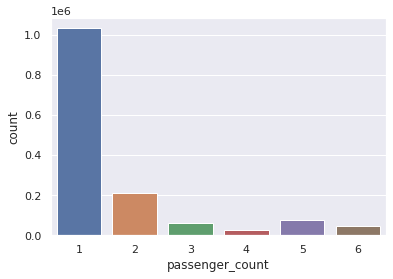

In [73]:
sns.countplot(x=df['passenger_count'] , data=df)
plt.show()

In [15]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [16]:
df['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [17]:
df['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

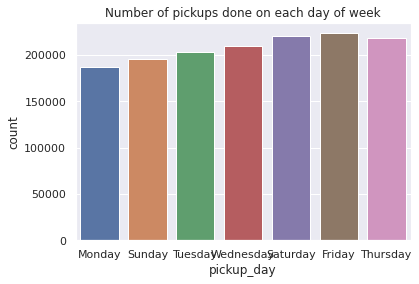

In [18]:
sns.countplot(x=df['pickup_day'])
plt.title('Number of pickups done on each day of week')
plt.show()

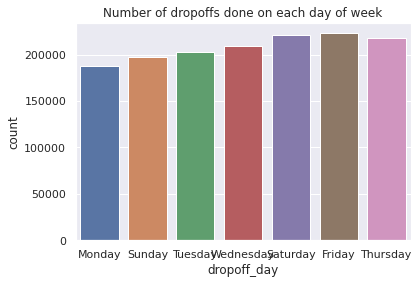

In [19]:
sns.countplot(x=df['dropoff_day'])
plt.title('Number of dropoffs done on each day of week')
plt.show()

In [20]:
def timezone(x):
  if x >= datetime.time(4,0,1) and x <= datetime.time(10,0,0):
    return 'morning'
  if x>= datetime.time(10,0,1) and x<= datetime.time(16 , 0, 0):
    return'midday'
  if x >= datetime.time(16,0,1) and x<= datetime.time(22,0,0):
    return'evening'
  elif x<= datetime.time(22,0,1) or x<= datetime.time(4,0,0):
    return 'late night'

In [21]:
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

In [22]:
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x:timezone(datetime.datetime.strptime(str(x) , "%Y-%m-%d %H:%M:%S").time()))

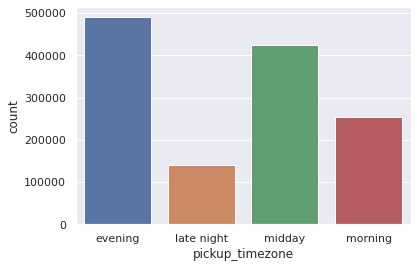

In [23]:
sns.countplot(x=df['pickup_timezone'])
plt.show()

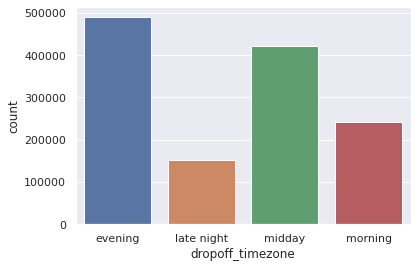

In [24]:
sns.countplot(x=df['dropoff_timezone'])
plt.show()

In [25]:
df['pickup_hour']= df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

Text(0.5, 1.0, 'Distribution plot of dropoff hours')

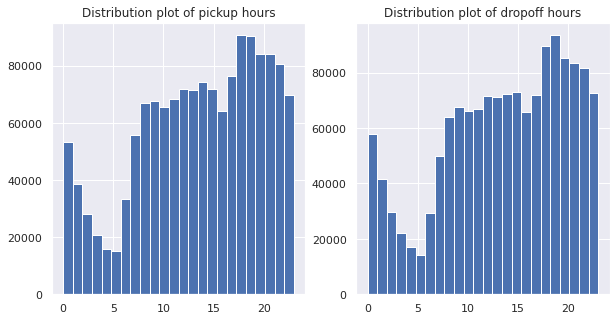

In [26]:
figure,ax=plt.subplots(nrows=1 , ncols=2 , figsize = (10,5))
df.pickup_hour.hist(bins=24 , ax=ax[0])
ax[0].set_title('Distribution plot of pickup hours')
df.dropoff_hour.hist(bins=24 , ax= ax[1])
ax[1].set_title('Distribution plot of dropoff hours')

In [27]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


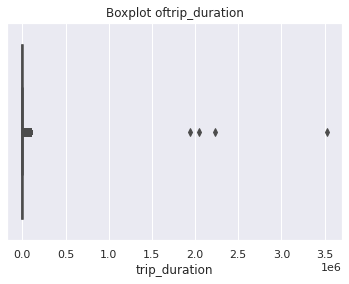

In [28]:
sns.boxplot(df['trip_duration'])
plt.title('Boxplot oftrip_duration')
plt.show()

In [29]:
df = df[df.trip_duration!=df.trip_duration.max()]

In [30]:
df = df[df.trip_duration!=df.trip_duration.max()]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


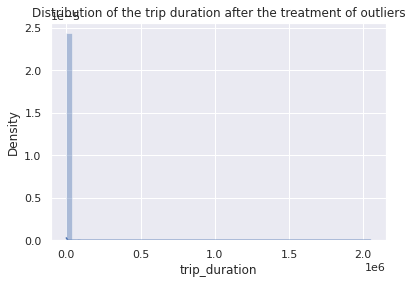

In [31]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the trip duration after the treatment of outliers')
plt.show()

In [32]:
df = df[df.trip_duration!=df.trip_duration.max()]# this code you have to run 2 times here

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


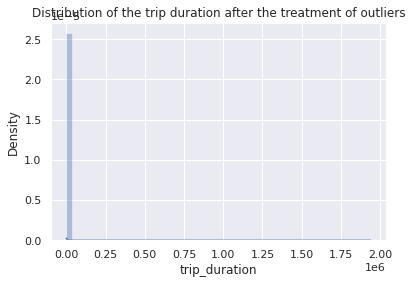

In [33]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the trip duration after the treatment of outliers')
plt.show()

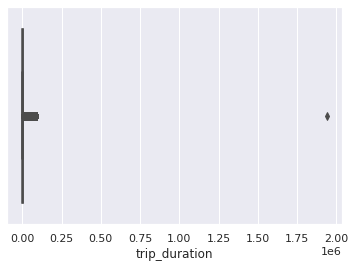

In [34]:
sns.boxplot(x=df['trip_duration'])
plt.show()

In [35]:
bins = np.array([0,1800,3600,5400,7200,90000])
df['duration_time'] = pd.cut(df.trip_duration,bins,labels=["<5" , "5-10" , "10-15" , "15-20", ">20"])

In [36]:
df.duration_time

0            <5
1            <5
2          5-10
3            <5
4            <5
           ... 
1458639      <5
1458640      <5
1458641      <5
1458642      <5
1458643      <5
Name: duration_time, Length: 1458641, dtype: category
Categories (5, object): ['<5' < '5-10' < '10-15' < '15-20' < '>20']

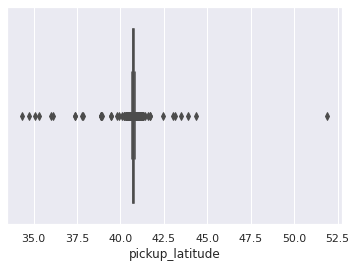

In [37]:
sns.boxplot(x=df['pickup_latitude'])
plt.show()

In [38]:
df = df[df.pickup_latitude!=df.pickup_latitude.max()]


In [39]:
df = df[df.pickup_latitude!=df.pickup_latitude.min()] # run this 3 times

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


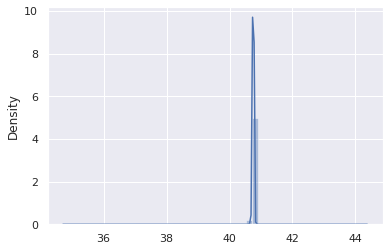

In [40]:
sns.distplot(x=df['pickup_latitude'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


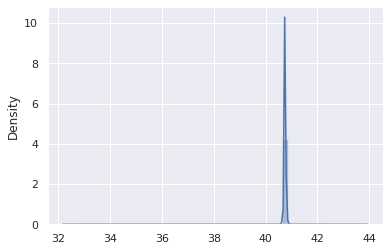

In [41]:
sns.distplot(x=df['dropoff_latitude'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


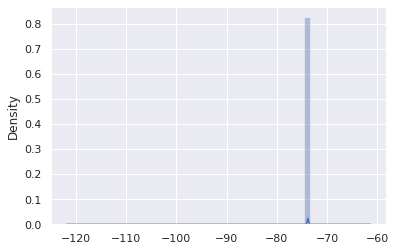

In [42]:
sns.distplot(x=df['pickup_longitude'])
plt.show()

In [43]:
df = df[df.pickup_longitude!=df.pickup_longitude.min()] # run this 3 times

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


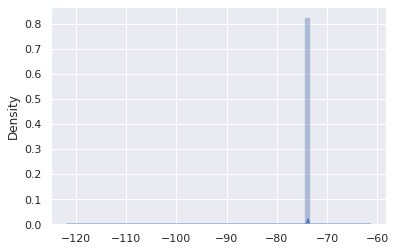

In [44]:
sns.distplot(x=df['pickup_longitude'])
plt.show()

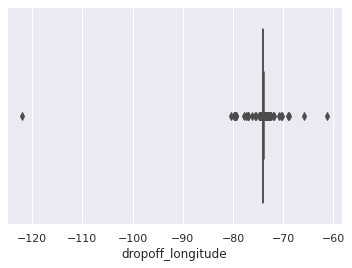

In [45]:
sns.boxplot(x=df['dropoff_longitude'])
plt.show()

In [46]:
df = df[df.dropoff_longitude!=df.dropoff_longitude.max()]

In [47]:
df = df[df.dropoff_longitude!=df.dropoff_longitude.min()]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


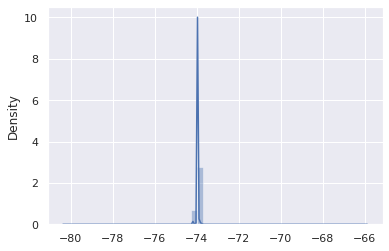

In [48]:
sns.distplot(x=df['dropoff_longitude'])
plt.show()

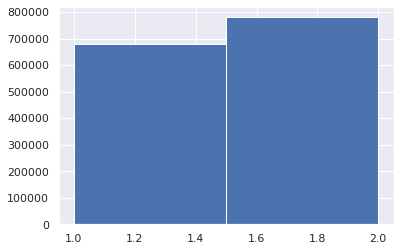

In [49]:
df['vendor_id'].hist(bins=2)

In [50]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time'],
      dtype='object')

In [51]:
df = df[df.trip_duration!=df.trip_duration.max()]

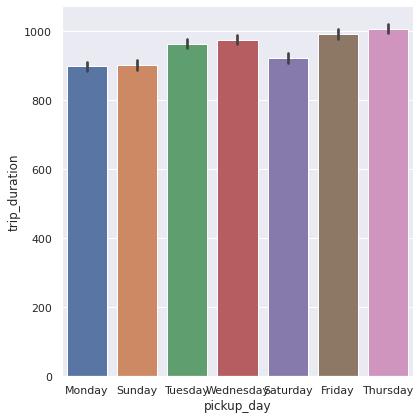

In [52]:
sns.catplot(x='pickup_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

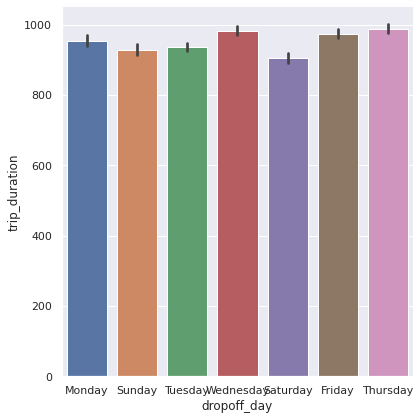

In [53]:
sns.catplot(x='dropoff_day' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

Text(0.5, 1.0, 'The distribution of percentage of different duration of trips')

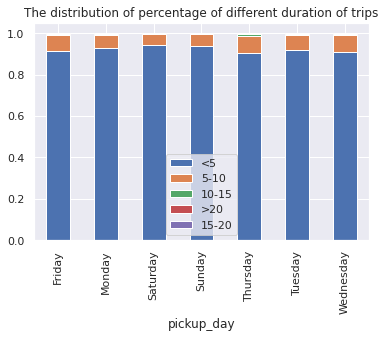

In [54]:
ax1 = df.groupby('pickup_day')['duration_time'].value_counts(normalize = True).unstack()
ax1.plot(kind='bar' , stacked = True)
plt.title('The distribution of percentage of different duration of trips')

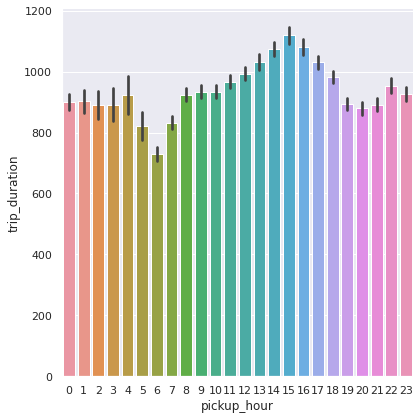

In [55]:
sns.catplot(x='pickup_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

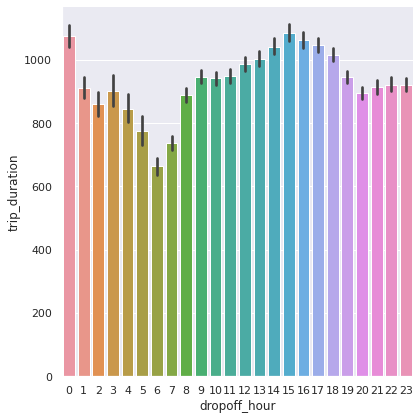

In [56]:
sns.catplot(x='dropoff_hour' , y='trip_duration' , kind = "bar" ,  data = df ,height = 6 , aspect = 1 )
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


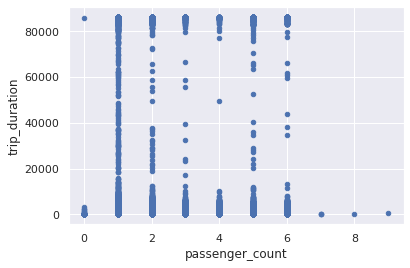

In [57]:
df.plot.scatter( x= 'passenger_count', y='trip_duration' )

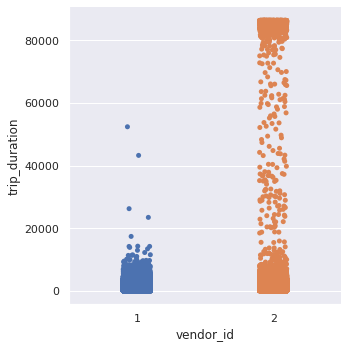

In [58]:
sns.catplot(x='vendor_id' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

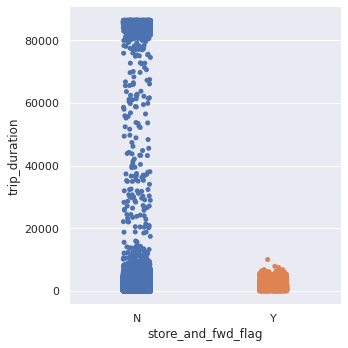

In [59]:
sns.catplot(x='store_and_fwd_flag' , y='trip_duration' , kind = "strip" ,  data = df )
plt.show()

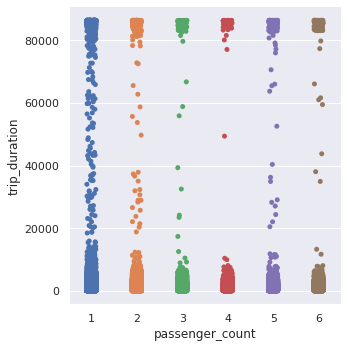

In [79]:
sns.catplot(y='trip_duration' , x='passenger_count' , data = df )

In [60]:
df['trip_duration_hour'] = df['trip_duration']/3600

In [61]:
df.passenger_count.value_counts()

1    1033536
2     210313
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [62]:
df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [63]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [64]:
from math import radians, cos, sin, asin, sqrt

def haversine(df):
  lat1 = df.pickup_latitude 
  lon1 = df.pickup_longitude 
  lat2 = df.dropoff_latitude
  lon2 = df.dropoff_longitude
  R = 6373.0 
  #this is in miles. For earth radius inkilometers use 6372.8 km
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
  return R*c


In [65]:
df['distance'] = df.apply(lambda x: haversine(x), axis = 1)

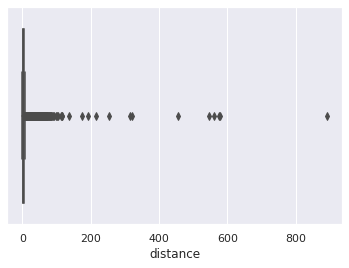

In [66]:
sns.boxplot(x=df['distance'])
plt.show()

In [67]:
print(len(df[df.distance == 0]))

5885


In [68]:
mean_dist = df['distance'].mean()
df.loc[df['distance']==0 , 'distance']=mean_dist

In [69]:
df['speed']=df['distance']/df['trip_duration_hour']

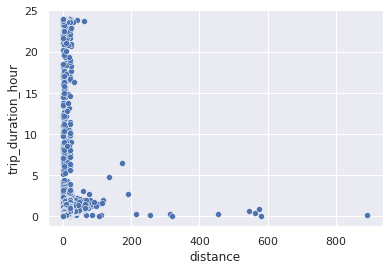

In [70]:
sns.scatterplot(x='distance' , y = 'trip_duration_hour' , data = df)

In [71]:
print(len(df[df.distance == 0]))

0


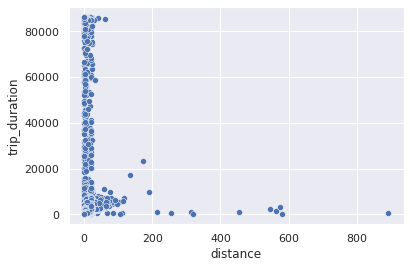

In [72]:
sns.scatterplot(data=df , x='distance' , y='trip_duration')

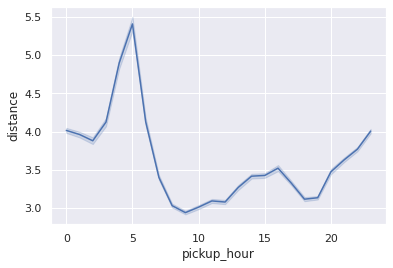

In [80]:
sns.lineplot(x='pickup_hour' , y='distance' , data = df)

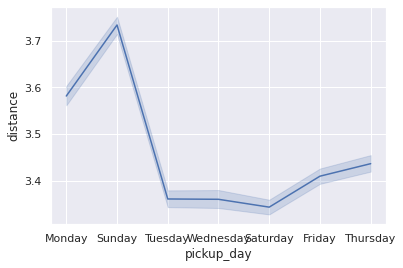

In [84]:
sns.lineplot(x='pickup_day' , y='distance' , data = df)